# **Micro-Credit Defaulter Model**
Submitted by Darshik A S
___

## Data Description

| **VARIABLE** | **DEFINITION** |
| :-| :-|
| **label** |	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan {1:success, 0:failure} |
| **msisdn** |	mobile number of user |
| **aon** |	age on cellular network in days |
| **daily_decr30** |	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) |
| **daily_decr90** |	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah) |
| **rental30** |	Average main account balance over last 30 days |
| **rental90** |	Average main account balance over last 90 days |
| **last_rech_date_ma** |	Number of days till last recharge of main account |
| **last_rech_date_da** |	Number of days till last recharge of data account |
| **last_rech_amt_ma** |	Amount of last recharge of main account (in Indonesian Rupiah) |
| **cnt_ma_rech30** |	Number of times main account got recharged in last 30 days |
| **fr_ma_rech30** |	Frequency of main account recharged in last 30 days |
| **sumamnt_ma_rech30** |	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah) |
| **medianamnt_ma_rech30** |	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah) |
| **medianmarechprebal30** |	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah) |
| **cnt_ma_rech90** |	Number of times main account got recharged in last 90 days |
| **fr_ma_rech90** |	Frequency of main account recharged in last 90 days |
| **sumamnt_ma_rech90** |	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah) |
| **medianamnt_ma_rech90** |	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah) |
| **medianmarechprebal90** |	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah) |
| **cnt_da_rech30** |	Number of times data account got recharged in last 30 days |
| **fr_da_rech30** |	Frequency of data account recharged in last 30 days |
| **cnt_da_rech90** |	Number of times data account got recharged in last 90 days |
| **fr_da_rech90** |	Frequency of data account recharged in last 90 days |
| **cnt_loans30** |	Number of loans taken by user in last 30 days |
| **amnt_loans30** |	Total amount of loans taken by user in last 30 days |
| **maxamnt_loans30** |	maximum amount of loan taken by the user in last 30 days |
| **medianamnt_loans30** |	Median of amounts of loan taken by the user in last 30 days |
| **cnt_loans90** |	Number of loans taken by user in last 90 days |
| **amnt_loans90** |	Total amount of loans taken by user in last 90 days |
| **maxamnt_loans90** |	maximum amount of loan taken by the user in last 90 days |
| **medianamnt_loans90** |	Median of amounts of loan taken by the user in last 90 days |
| **payback30** |	Average payback time in days over last 30 days |
| **payback90** |	Average payback time in days over last 90 days |
| **pcircle** |	telecom circle |
| **pdate** |	date |

## Data Preparation

In [206]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

In [401]:
# Loading data into pandas dataframe
data = pd.read_csv('Data file.csv',index_col=0)

In [208]:
data.sample(5)

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
97631       1  38134I70372   195.0   4046.000000      4092.170    492.39   
166689      1  47830I70784   513.0      4.703000         4.703     17.08   
45639       1  11917I94123   662.0  23459.000000     25323.400   4139.39   
4187        1  49854I90843   750.0  19109.000000     26740.270   7438.74   
81844       1  29656I89232  2165.0   4061.987333      4086.940    354.89   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
97631    1685.49               10.0                0.0              3178  ...   
166689     17.08                2.0                0.0              1547  ...   
45639    6073.44                3.0                0.0              1539  ...   
4187     9153.54                4.0                0.0              2309  ...   
81844     462.90               28.0                0.0             11874  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
97631               6.0                 0.0     5.000000            30   
166689              6.0                 0.0     2.000000            12   
45639              12.0                 0.0  1481.808394            36   
4187                6.0                 0.0     7.000000            48   
81844               6.0                 0.0     2.000000            12   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
97631                 6                 0.0  13.000000   8.000000      UPW   
166689                6                 0.0   0.000000   0.000000      UPW   
45639                12                 0.0   1.333333   2.750000      UPW   
4187                 12                 0.0   3.333333   2.857143      UPW   
81844                 6                 0.0   0.000000   0.000000      UPW   

             pdate  
97631   2016-07-30  
166689  2016-06-01  
45639   2016-08-03  
4187    2016-08-10  
81844   2016-07-07  

[5 rows x 36 columns]

In [209]:
# Checking types of each variable and presence of null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

* The data doesn't have any null values
* The target variable is **label**

In [210]:
# Check for duplicate records
data.duplicated().sum()

1

In [211]:
# Removing duplicate records
data.drop_duplicates(keep='first',inplace=True)

### **Lets find out how many distinct values are present in each variables**

In [212]:
# Number of distinct labels in variables of object and int64 type
for i in data.select_dtypes(include=['object']):
    print(i,':',data[i].nunique())
    print(data[i].unique())

msisdn : 186243
['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
pcircle : 1
['UPW']
pdate : 82
['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'
 '2016-06-28' '2016-06-11' '2016-07-27' '2016-07-23' '2016-08-16'
 '2016-08-15' '2016-06-02' '2016-06-05' '2016-08-02' '2016-07-28'
 '2016-07-18' '2016-08-18' '2016-07-16' '2016-07-29' '2016-07-21'
 '2016-06-03' '2016-06-13' '2016-08-01' '2016-07-13' '2016-07-10'
 '2016-06-09' '2016-07-15' '2016-07-11' '2016-08-09' '2016-08-12'
 '2016-07-22' '2016-06-04' '2016-07-24' '2016-06-18' '2016-08-13'
 '20

* All the records belongs to only one telecom circle UPW, So the **pcircle** varibale can be dropped
* Many users are having the same mobile numbers, these users might belong to same group or a family.
* Lets extract the digits as features and check if they are significant or not.

In [213]:
import re

In [214]:
df = data.msisdn.agg(lambda x: pd.Series([int(i) for i in re.findall('([0-9])',x)]))
df.columns = ['dig_'+str(i) for i in range(1,11)]
data = pd.concat([df,data],axis=1)

In [215]:
data.sample(5)

dig_1  dig_2  dig_3  dig_4  dig_5  dig_6  dig_7  dig_8  dig_9  dig_10  \
160151      4      7      8      6      9      7      0      3      7       4   
169765      9      4      3      6      3      9      0      8      4       3   
128558      7      0      8      7      2      9      0      8      4       5   
134470      9      4      5      4      2      9      5      2      0       2   
11858       1      9      5      8      5      9      5      3      6       9   

        ...  maxamnt_loans30 medianamnt_loans30  cnt_loans90  amnt_loans90  \
160151  ...              6.0                0.5          5.0            30   
169765  ...              6.0                0.0          2.0            12   
128558  ...             12.0                0.0          5.0            48   
134470  ...              6.0                0.0          1.0             6   
11858   ...             12.0                0.0         11.0            78   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
160151                6                 0.0        0.0   4.800000      UPW   
169765                6                 0.0        9.5   9.500000      UPW   
128558               12                 0.0        2.0   1.750000      UPW   
134470                6                 0.0        0.0   0.000000      UPW   
11858                12                 0.0        1.9   2.818182      UPW   

             pdate  
160151  2016-08-04  
169765  2016-06-28  
128558  2016-07-12  
134470  2016-08-19  
11858   2016-07-09  

[5 rows x 46 columns]

In [216]:
# Number of distinct labels in variables of int64 type
for i in data.select_dtypes(include=['int64']):
    print(i,':',data[i].nunique())

dig_1 : 10
dig_2 : 10
dig_3 : 10
dig_4 : 10
dig_5 : 10
dig_6 : 3
dig_7 : 10
dig_8 : 10
dig_9 : 10
dig_10 : 10
label : 2
last_rech_amt_ma : 70
cnt_ma_rech30 : 71
cnt_ma_rech90 : 110
fr_ma_rech90 : 89
sumamnt_ma_rech90 : 31771
cnt_da_rech90 : 27
fr_da_rech90 : 46
cnt_loans30 : 40
amnt_loans30 : 48
amnt_loans90 : 69
maxamnt_loans90 : 3


In [217]:
# Number of distinct values in variables of float type
for i in data.select_dtypes(exclude=['object','int64']):
    print(i,':',data[i].nunique())

aon : 4507
daily_decr30 : 147026
daily_decr90 : 158670
rental30 : 132148
rental90 : 141033
last_rech_date_ma : 1186
last_rech_date_da : 1174
fr_ma_rech30 : 1083
sumamnt_ma_rech30 : 15141
medianamnt_ma_rech30 : 510
medianmarechprebal30 : 30428
medianamnt_ma_rech90 : 608
medianmarechprebal90 : 29785
cnt_da_rech30 : 1066
fr_da_rech30 : 1072
maxamnt_loans30 : 1050
medianamnt_loans30 : 6
cnt_loans90 : 1110
medianamnt_loans90 : 6
payback30 : 1363
payback90 : 2381


In [218]:
import datetime

In [219]:
# Calculating number of days till today ('2021-01-31')
now = datetime.datetime.strptime('2021-01-31', '%Y-%m-%d')
days = data.pdate.agg(lambda x: (now-datetime.datetime.strptime(x, '%Y-%m-%d')).days)
data.pdate = days

In [220]:
### Dropping pcircle and msisdn
data.drop(columns=['pcircle'],inplace=True)
data.drop(columns=['msisdn'],inplace=True)

In [221]:
### Description
data.select_dtypes(include=['int64','float64']).describe().T

count          mean           std           min  \
dig_1                 209592.0      4.474293      2.877436      0.000000   
dig_2                 209592.0      4.507080      2.878535      0.000000   
dig_3                 209592.0      4.491660      2.873100      0.000000   
dig_4                 209592.0      4.489484      2.878331      0.000000   
dig_5                 209592.0      4.488134      2.868139      0.000000   
dig_6                 209592.0      8.070680      0.693823      7.000000   
dig_7                 209592.0      3.226731      3.289428      0.000000   
dig_8                 209592.0      4.734389      2.133178      0.000000   
dig_9                 209592.0      5.103387      2.449767      0.000000   
dig_10                209592.0      4.642820      3.173081      0.000000   
label                 209592.0      0.875177      0.330519      0.000000   
aon                   209592.0   8112.380399  75696.261220    -48.000000   
daily_decr30          209592.0   5381.412999   9220.644093    -93.012667   
daily_decr90          209592.0   6082.529123  10918.836919    -93.012667   
rental30              209592.0   2692.578912   4308.596841 -23737.140000   
rental90              209592.0   3483.407309   5770.475034 -24720.580000   
last_rech_date_ma     209592.0   3755.865715  53906.020204    -29.000000   
last_rech_date_da     209592.0   3712.220632  53374.960145    -29.000000   
last_rech_amt_ma      209592.0   2064.458973   2370.790003      0.000000   
cnt_ma_rech30         209592.0      3.978053      4.256099      0.000000   
fr_ma_rech30          209592.0   3737.372947  53643.752523      0.000000   
sumamnt_ma_rech30     209592.0   7704.496570  10139.645685      0.000000   
medianamnt_ma_rech30  209592.0   1812.819258   2070.869474      0.000000   
medianmarechprebal30  209592.0   3851.945862  54006.502647   -200.000000   
cnt_ma_rech90         209592.0      6.315437      7.193487      0.000000   
fr_ma_rech90          209592.0      7.716812     12.590273      0.000000   
sumamnt_ma_rech90     209592.0  12396.236149  16857.832129      0.000000   
medianamnt_ma_rech90  209592.0   1864.597375   2081.685508      0.000000   
medianmarechprebal90  209592.0     92.025522    369.216539   -200.000000   
cnt_da_rech30         209592.0    262.579362   4183.907920      0.000000   
fr_da_rech30          209592.0   3749.512336  53885.542905      0.000000   
cnt_da_rech90         209592.0      0.041495      0.397557      0.000000   
fr_da_rech90          209592.0      0.045713      0.951388      0.000000   
cnt_loans30           209592.0      2.758975      2.554507      0.000000   
amnt_loans30          209592.0     17.951992     17.379778      0.000000   
maxamnt_loans30       209592.0    274.660029   4245.274734      0.000000   
medianamnt_loans30    209592.0      0.054029      0.218039      0.000000   
cnt_loans90           209592.0     18.520988    224.797957      0.000000   
amnt_loans90          209592.0     23.645397     26.469924      0.000000   
maxamnt_loans90       209592.0      6.703138      2.103869      0.000000   
medianamnt_loans90    209592.0      0.046078      0.200692      0.000000   
payback30             209592.0      3.398639      8.813330      0.000000   
payback90             209592.0      4.321302     10.307791      0.000000   
pdate                 209592.0   1667.487423     21.989659   1624.000000   

                              25%          50%         75%            max  
dig_1                    2.000000     4.000000      7.0000       9.000000  
dig_2                    2.000000     5.000000      7.0000       9.000000  
dig_3                    2.000000     4.000000      7.0000       9.000000  
dig_4                    2.000000     4.000000      7.0000       9.000000  
dig_5                    2.000000     4.000000      7.0000       9.000000  
dig_6                    8.000000     8.000000      9.0000       9.000000  
dig_7                    0.000000     2.000000      5.0000       9.00000

* There are negative values in the variables, these could mistyped errors. We can convert into its absolute values.

In [222]:
### Taking absolute values
cols = data.select_dtypes(include=['int64','float64']).columns
data.loc[:,cols] = data.select_dtypes(include=['int64','float64']).agg(lambda x:abs(x))

In [223]:
### Description after handling negative values
data.select_dtypes(include=['int64','float64']).describe().T

count          mean           std     min  \
dig_1                 209592.0      4.474293      2.877436     0.0   
dig_2                 209592.0      4.507080      2.878535     0.0   
dig_3                 209592.0      4.491660      2.873100     0.0   
dig_4                 209592.0      4.489484      2.878331     0.0   
dig_5                 209592.0      4.488134      2.868139     0.0   
dig_6                 209592.0      8.070680      0.693823     7.0   
dig_7                 209592.0      3.226731      3.289428     0.0   
dig_8                 209592.0      4.734389      2.133178     0.0   
dig_9                 209592.0      5.103387      2.449767     0.0   
dig_10                209592.0      4.642820      3.173081     0.0   
label                 209592.0      0.875177      0.330519     0.0   
aon                   209592.0   8112.845675  75696.211355     1.0   
daily_decr30          209592.0   5381.442003   9220.627165     0.0   
daily_decr90          209592.0   6082.558196  10918.820723     0.0   
rental30              209592.0   2715.373669   4294.267480     0.0   
rental90              209592.0   3509.498048   5754.644314     0.0   
last_rech_date_ma     209592.0   3756.143760  53906.000830     0.0   
last_rech_date_da     209592.0   3712.222512  53374.960014     0.0   
last_rech_amt_ma      209592.0   2064.458973   2370.790003     0.0   
cnt_ma_rech30         209592.0      3.978053      4.256099     0.0   
fr_ma_rech30          209592.0   3737.372947  53643.752523     0.0   
sumamnt_ma_rech30     209592.0   7704.496570  10139.645685     0.0   
medianamnt_ma_rech30  209592.0   1812.819258   2070.869474     0.0   
medianmarechprebal30  209592.0   3854.236951  54006.339189     0.0   
cnt_ma_rech90         209592.0      6.315437      7.193487     0.0   
fr_ma_rech90          209592.0      7.716812     12.590273     0.0   
sumamnt_ma_rech90     209592.0  12396.236149  16857.832129     0.0   
medianamnt_ma_rech90  209592.0   1864.597375   2081.685508     0.0   
medianmarechprebal90  209592.0     94.436308    368.607286     0.0   
cnt_da_rech30         209592.0    262.579362   4183.907920     0.0   
fr_da_rech30          209592.0   3749.512336  53885.542905     0.0   
cnt_da_rech90         209592.0      0.041495      0.397557     0.0   
fr_da_rech90          209592.0      0.045713      0.951388     0.0   
cnt_loans30           209592.0      2.758975      2.554507     0.0   
amnt_loans30          209592.0     17.951992     17.379778     0.0   
maxamnt_loans30       209592.0    274.660029   4245.274734     0.0   
medianamnt_loans30    209592.0      0.054029      0.218039     0.0   
cnt_loans90           209592.0     18.520988    224.797957     0.0   
amnt_loans90          209592.0     23.645397     26.469924     0.0   
maxamnt_loans90       209592.0      6.703138      2.103869     0.0   
medianamnt_loans90    209592.0      0.046078      0.200692     0.0   
payback30             209592.0      3.398639      8.813330     0.0   
payback90             209592.0      4.321302     10.307791     0.0   
pdate                 209592.0   1667.487423     21.989659  1624.0   

                              25%          50%         75%            max  
dig_1                    2.000000     4.000000      7.0000       9.000000  
dig_2                    2.000000     5.000000      7.0000       9.000000  
dig_3                    2.000000     4.000000      7.0000       9.000000  
dig_4                    2.000000     4.000000      7.0000       9.000000  
dig_5                    2.000000     4.000000      7.0000       9.000000  
dig_6                    8.000000     8.000000      9.0000       9.000000  
dig_7                    0.000000     2.000000      5.0000       9.000000  
dig_8                    3.000000     5.000000      7.0000       9.000000  
dig_9                    3.000000     5.000000      8.0000       9.000000  
dig_10                   2.000000     5.000000      8.0000       9.000000  
label                    1.000000     

In [225]:
data_length = len(data)
print(data_length)

209592


In [226]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
sns.set_context('notebook')

In [227]:
### Outliers detection
def IQR_outlier_detection(x):
    q25 = x.quantile(0.25)
    q75 = x.quantile(0.75)
    IQR = q75 - q25
    lower_bound = q25 - IQR*1.5
    upper_bound = q75 + IQR*1.5
    return x[(x < lower_bound) | (x > upper_bound)]

# Extreme outliers detection
def IQR_ext_outlier_detection(x):
    q25 = x.quantile(0.25)
    q75 = x.quantile(0.75)
    IQR = q75 - q25
    lower_bound = q25 - IQR*3.0
    upper_bound = q75 + IQR*3.0
    return x[(x < lower_bound) | (x > upper_bound)]

# Reduction in records
def percentage_reduction(data):
    print('Percentage reduction in records : {0:.2f}%'.format((1-(len(data)/data_length))*100))

# Generate report for outlier detection and removal
def generate_report_outlier_detection(data,col):
    
    plt.figure(figsize=(15,3))
    plt.subplot(1,3,1)
    sns.distplot(data[col],rug=True,rug_kws={'color':'black','alpha':0.5,'height':0.1})
    plt.title('{} distribution'.format(col))
    
    outlier_index = IQR_outlier_detection(data[col]).index
    ext_outlier_index = IQR_ext_outlier_detection(data[col]).index
    
    red_data = data.drop(index=ext_outlier_index)
    plt.subplot(1,3,2)
    sns.distplot(red_data[col],rug=True,color='coral',rug_kws={'color':'black','alpha':0.5,'height':0.1})
    plt.title('{} distribution after removing extreme outliers'.format(col))
    
    red_data = data.drop(index=outlier_index)
    plt.subplot(1,3,3)
    sns.distplot(red_data[col],rug=True,color='lightgreen',rug_kws={'color':'black','alpha':0.5,'height':0.1})
    plt.title('{} distribution after removing all outliers'.format(col))
    
    plt.tight_layout()
    plt.show()
    
    # Detecting outliers
    print('Percentage total outliers : {0:.2f}%'.format((len(outlier_index) / data_length)*100))
    print('Percentage of extreme outliers : {0:.2f}%'.format((len(ext_outlier_index) / data_length)*100))

### Let's check if there is any outliers or non realistic data in the varaiables

### AON

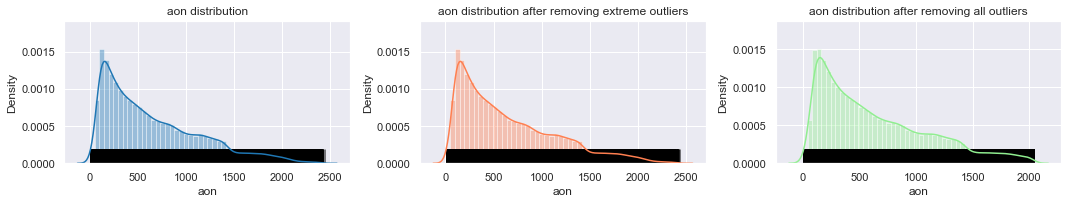

Percentage total outliers : 0.98%
Percentage of extreme outliers : 0.00%


In [293]:
generate_report_outlier_detection(data,'aon')

In [228]:
# Removing outlier records
data = data[data.aon < 0.4E6]
data.reset_index(drop=True,inplace=True)
percentage_reduction(data.drop(index=IQR_ext_outlier_detection(data.aon).index))

Percentage reduction in records : 1.00%


### last_rech_date_ma

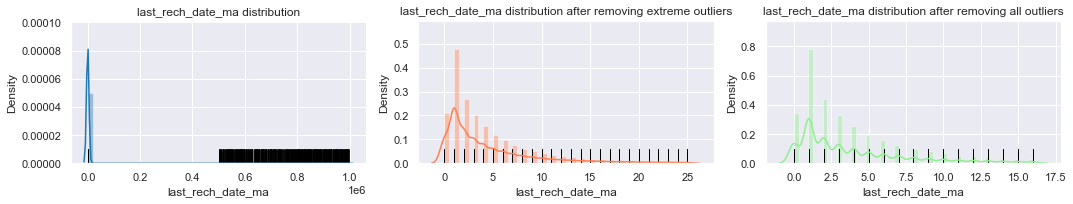

Percentage total outliers : 9.45%
Percentage of extreme outliers : 5.18%


In [294]:
generate_report_outlier_detection(data,'last_rech_date_ma')

In [229]:
data = data[data.last_rech_date_ma < 0.4E6]
data.reset_index(drop=True,inplace=True)
percentage_reduction(data)

Percentage reduction in records : 1.49%


### last_rech_date_da

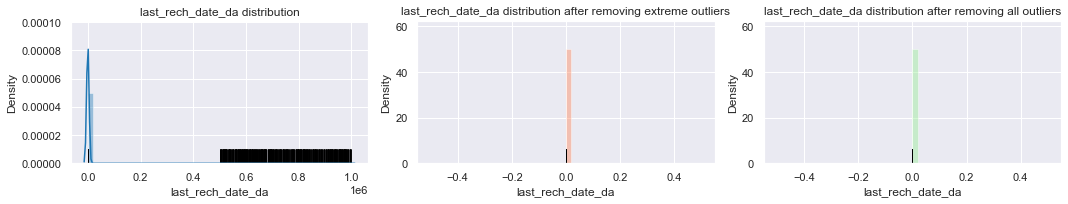

Percentage total outliers : 3.17%
Percentage of extreme outliers : 3.17%


In [296]:
generate_report_outlier_detection(data,'last_rech_date_da')

In [230]:
data = data[data.last_rech_date_da < 0.4E6]
data.reset_index(drop=True,inplace=True)
percentage_reduction(data)

Percentage reduction in records : 1.98%


### cnt_ma_rech30

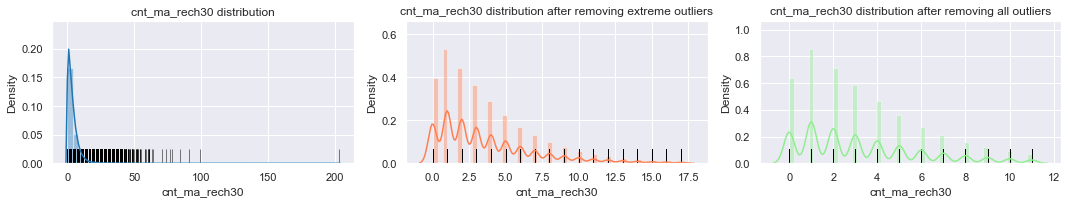

Percentage total outliers : 5.28%
Percentage of extreme outliers : 1.46%


In [298]:
generate_report_outlier_detection(data,'cnt_ma_rech30')

In [231]:
data = data[data.cnt_ma_rech30 < 200]
data.reset_index(drop=True,inplace=True)
percentage_reduction(data)

Percentage reduction in records : 1.98%


### fr_ma_rech30

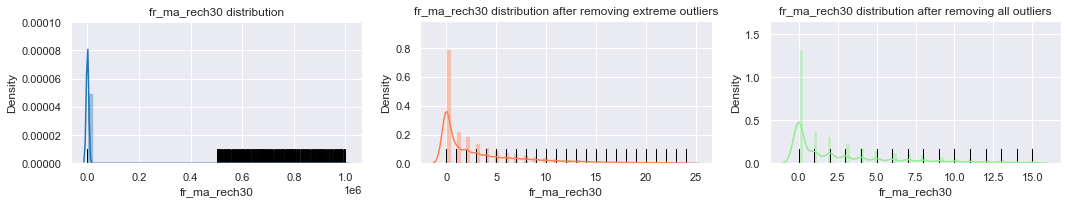

Percentage total outliers : 5.35%
Percentage of extreme outliers : 1.31%


In [300]:
generate_report_outlier_detection(data,'fr_ma_rech30')

In [232]:
data = data[data.fr_ma_rech30 < 0.4E6]
data.reset_index(drop=True,inplace=True)
percentage_reduction(data)

Percentage reduction in records : 2.48%


### sumamnt_ma_rech30

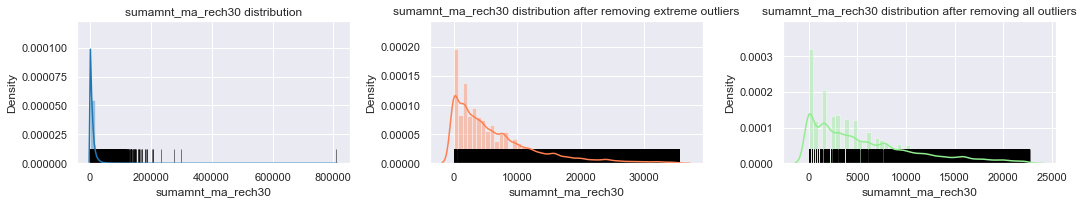

Percentage total outliers : 6.14%
Percentage of extreme outliers : 2.06%


In [302]:
generate_report_outlier_detection(data,'sumamnt_ma_rech30')

In [233]:
data = data[data.sumamnt_ma_rech30 < 0.4E6]
data.reset_index(drop=True,inplace=True)
percentage_reduction(data)

Percentage reduction in records : 2.48%


### medianamnt_ma_rech30

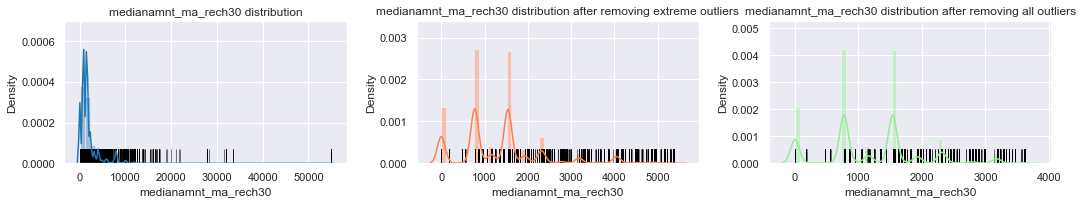

Percentage total outliers : 11.59%
Percentage of extreme outliers : 6.79%


In [304]:
generate_report_outlier_detection(data,'medianamnt_ma_rech30')

In [234]:
data = data[data.medianamnt_ma_rech30 < 50000]
data.reset_index(drop=True,inplace=True)
percentage_reduction(data)

Percentage reduction in records : 2.48%


### cnt_da_rech30

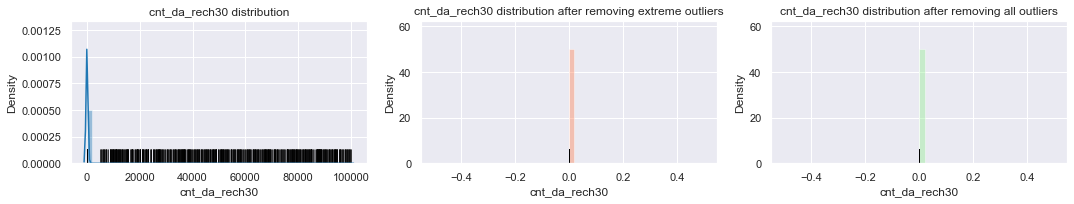

Percentage total outliers : 1.92%
Percentage of extreme outliers : 1.92%


In [306]:
generate_report_outlier_detection(data,'cnt_da_rech30')

In [235]:
data.cnt_da_rech30.value_counts().head(20)

0.000000        200378
1.000000          2271
2.000000           366
3.000000           151
4.000000            85
5.000000            32
6.000000            26
7.000000            20
9.000000            12
8.000000             8
10.000000            5
11.000000            4
13.000000            3
12.000000            2
16.000000            2
49967.856780         1
42573.460634         1
56844.491308         1
90712.735498         1
54377.752115         1
Name: cnt_da_rech30, dtype: int64

In [236]:
data = data[data.cnt_da_rech30 < 17]
data.reset_index(drop=True,inplace=True)
percentage_reduction(data)

Percentage reduction in records : 2.97%


### fr_da_rech30

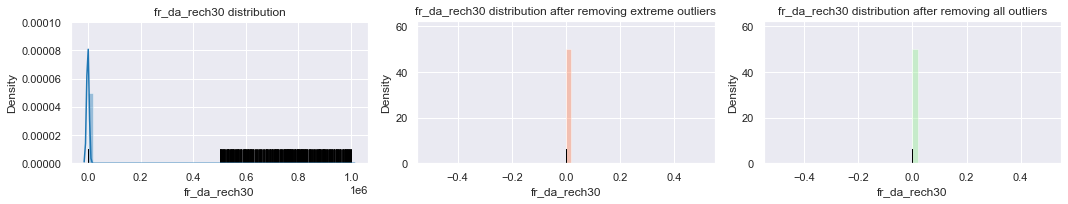

Percentage total outliers : 0.73%
Percentage of extreme outliers : 0.73%


In [309]:
generate_report_outlier_detection(data,'fr_da_rech30')

In [237]:
data = data[data.fr_da_rech30 < 0.4E6]
data.reset_index(drop=True,inplace=True)
percentage_reduction(data)

Percentage reduction in records : 3.45%


### maxamnt_loans30

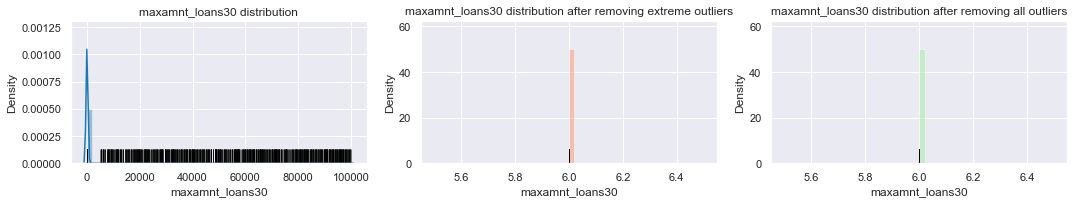

Percentage total outliers : 14.01%
Percentage of extreme outliers : 14.01%


In [314]:
generate_report_outlier_detection(data,'maxamnt_loans30')

In [238]:
data = data[data.maxamnt_loans30 < 13]
data.reset_index(drop=True,inplace=True)
percentage_reduction(data)

Percentage reduction in records : 3.94%


### cnt_loans90

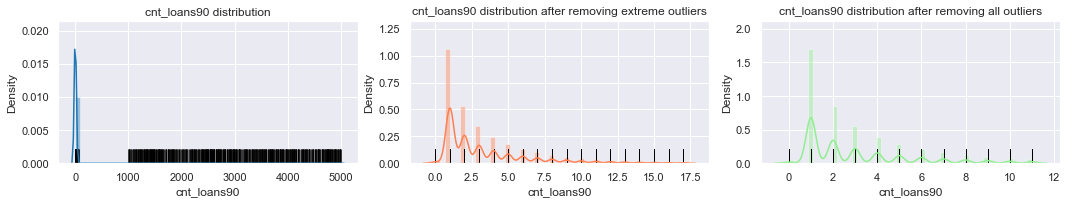

Percentage total outliers : 5.28%
Percentage of extreme outliers : 1.91%


In [317]:
generate_report_outlier_detection(data,'cnt_loans90')

In [239]:
data = data[data.cnt_loans90 < 500]
data.reset_index(drop=True,inplace=True)
percentage_reduction(data)

Percentage reduction in records : 4.42%


### medianmarechprebal30

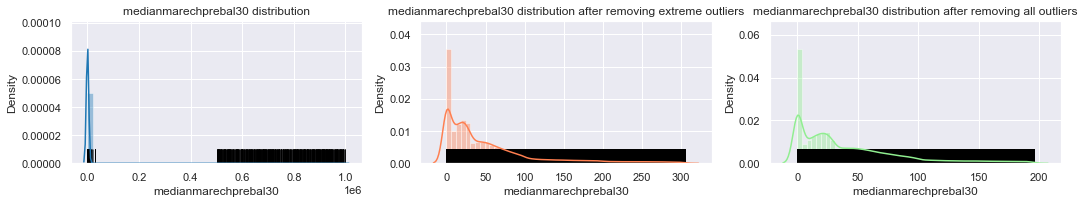

Percentage total outliers : 11.56%
Percentage of extreme outliers : 6.98%


In [319]:
generate_report_outlier_detection(data,'medianmarechprebal30')

In [240]:
data = data[data.medianmarechprebal30 < 0.4E6]
data.reset_index(drop=True,inplace=True)
percentage_reduction(data)

Percentage reduction in records : 4.89%


### sumamnt_ma_rech90

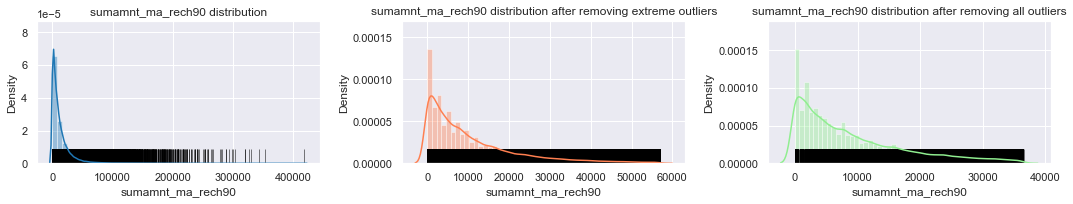

Percentage total outliers : 6.33%
Percentage of extreme outliers : 2.29%


In [321]:
generate_report_outlier_detection(data,'sumamnt_ma_rech90')

In [241]:
data = data[data.sumamnt_ma_rech90 < 0.4E6]
data.reset_index(drop=True,inplace=True)
percentage_reduction(data)

Percentage reduction in records : 4.89%


### Removing records of poeple having no loan history

In [248]:
data = data.iloc[data[data.cnt_loans90 > 0].index]

In [249]:
data.reset_index(drop=True, inplace=True)

In [251]:
percentage_reduction(data)

Percentage reduction in records : 5.81%


### Lets check the variable relationship

In [252]:
from dython.nominal import compute_associations

In [253]:
### Categorical or nominal columns
nominal_columns = []
for i in data.columns:
    if data[i].nunique() <= 10:
        nominal_columns.append(i)

In [254]:
rel = compute_associations(data,nominal_columns=nominal_columns,mark_columns=True)

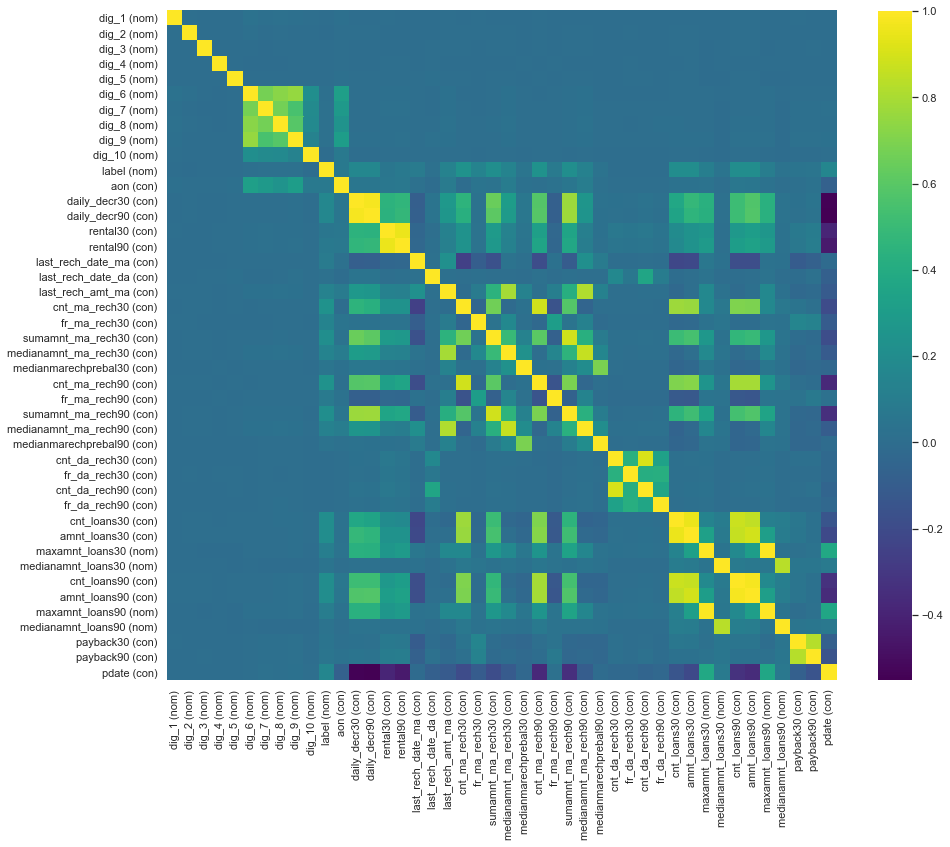

In [255]:
plt.figure(figsize=(15,15))
sns.heatmap(rel,square=True,annot=False,cmap='viridis',cbar_kws={"shrink": 0.82})
plt.show()

In [256]:
### Find out the difference in the groups
from scipy.stats import ttest_ind

In [257]:
def conduct_ttest_ind(col):
    print('H0 : The mean of '+col+' is EQUAL for both categories of label')
    print('H1 : The mean of '+col+' is NOT EQUAL for both categories of label')
    grp0 = data[data.label==0][col]
    grp1 = data[data.label==1][col]
    ttest = ttest_ind(grp0,grp1)
    print('T Statistic : ',round(ttest[0],5))
    print('p Value : ',round(ttest[1],5))
    reject_null = (ttest[1] < 0.05) & (abs(ttest[0]) > 2.262)
    return reject_null

In [258]:
reject_h0 = []

for i in data.drop(columns=['label']).columns:
    
    if conduct_ttest_ind(i):
        print('Reject H0')
        reject_h0.append(i)
    else:
        print('Failed to reject H0')
    print('---------------------------------------------------------------------------------')
    

H0 : The mean of dig_1 is EQUAL for both categories of label
H1 : The mean of dig_1 is NOT EQUAL for both categories of label
T Statistic :  -0.64768
p Value :  0.51719
Failed to reject H0
---------------------------------------------------------------------------------
H0 : The mean of dig_2 is EQUAL for both categories of label
H1 : The mean of dig_2 is NOT EQUAL for both categories of label
T Statistic :  0.81658
p Value :  0.41417
Failed to reject H0
---------------------------------------------------------------------------------
H0 : The mean of dig_3 is EQUAL for both categories of label
H1 : The mean of dig_3 is NOT EQUAL for both categories of label
T Statistic :  1.46113
p Value :  0.14398
Failed to reject H0
---------------------------------------------------------------------------------
H0 : The mean of dig_4 is EQUAL for both categories of label
H1 : The mean of dig_4 is NOT EQUAL for both categories of label
T Statistic :  -0.23221
p Value :  0.81637
Failed to reject H0


T Statistic :  -91.40572
p Value :  0.0
Reject H0
---------------------------------------------------------------------------------
H0 : The mean of amnt_loans30 is EQUAL for both categories of label
H1 : The mean of amnt_loans30 is NOT EQUAL for both categories of label
T Statistic :  -91.78931
p Value :  0.0
Reject H0
---------------------------------------------------------------------------------
H0 : The mean of maxamnt_loans30 is EQUAL for both categories of label
H1 : The mean of maxamnt_loans30 is NOT EQUAL for both categories of label
T Statistic :  -40.09113
p Value :  0.0
Reject H0
---------------------------------------------------------------------------------
H0 : The mean of medianamnt_loans30 is EQUAL for both categories of label
H1 : The mean of medianamnt_loans30 is NOT EQUAL for both categories of label
T Statistic :  -20.27004
p Value :  0.0
Reject H0
---------------------------------------------------------------------------------
H0 : The mean of cnt_loans90 is EQ

In [259]:
data_temp = data.copy()

In [260]:
reject_h0.append('label')

In [261]:
### Drop columns which are statistically insignificant
data = data[reject_h0]

## Univariate Analysis of the features

### Target distribution in the original dataset

In [264]:
### Class proportion
data.label.value_counts()/len(data)

1    0.873984
0    0.126016
Name: label, dtype: float64

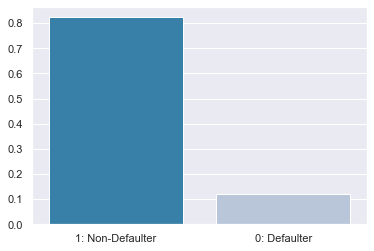

In [263]:
### Distribtuion of target class
sns.barplot(x=['1: Non-Defaulter','0: Defaulter'],y=list(data.label.value_counts()/data_length),palette='PuBu_r')
plt.show()

### Distribution of numeric variables

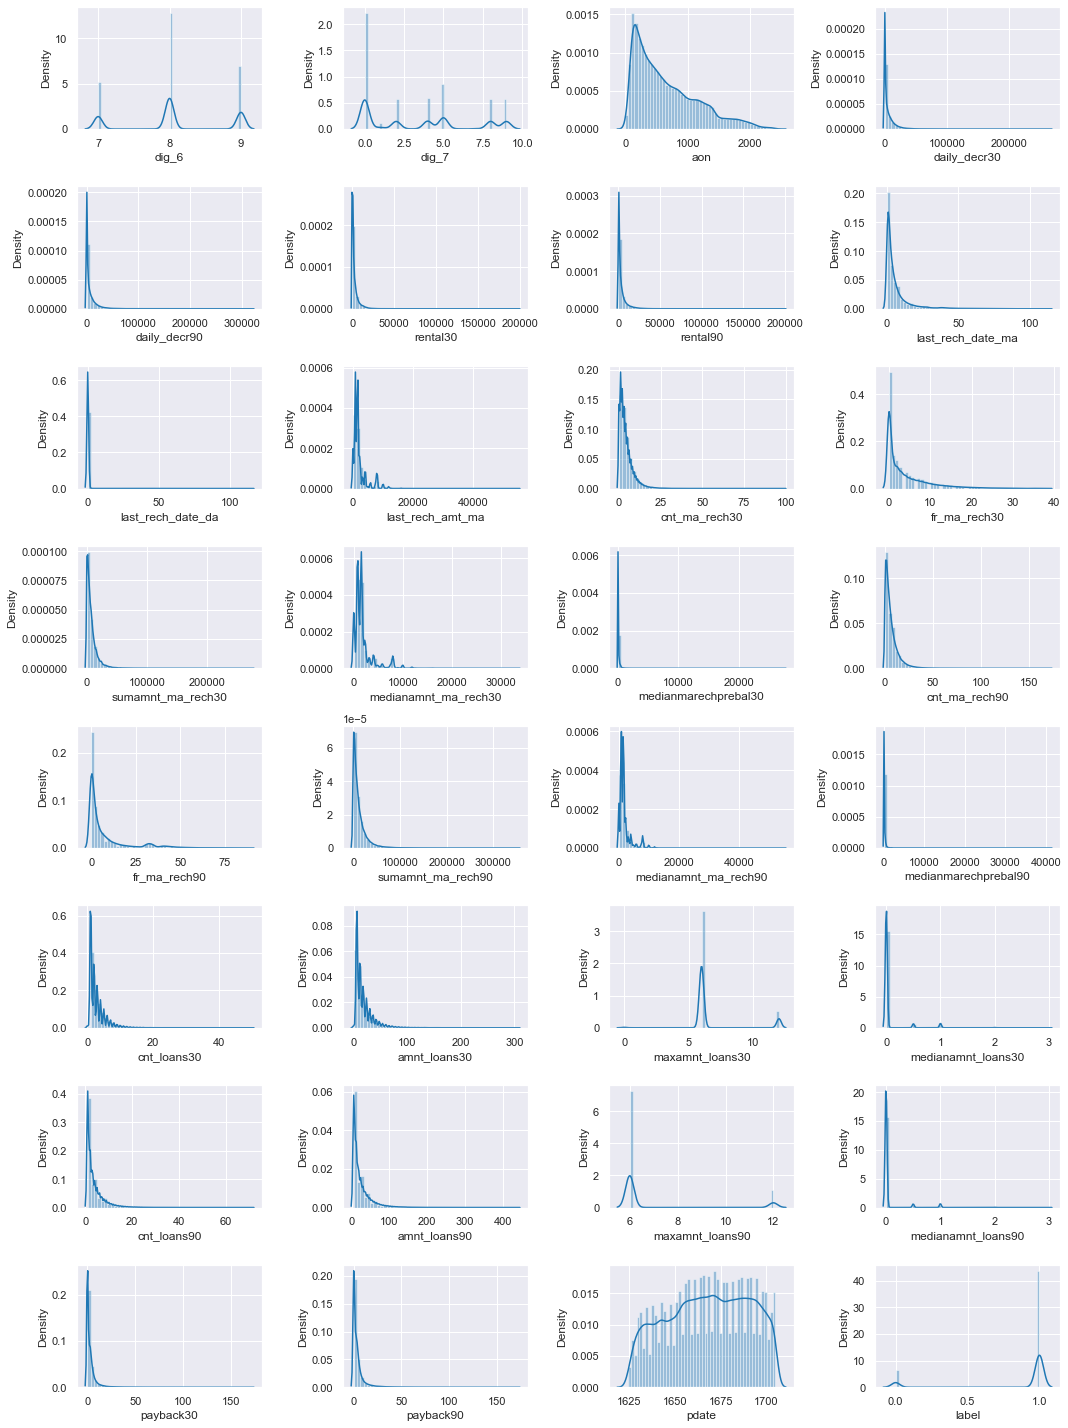

In [266]:
plt.figure(figsize=(15,20))
for i,j in enumerate(data.columns):
    plt.subplot(8,4,i+1)
    sns.distplot(data[j])
plt.tight_layout()
plt.show()

### Let's find out the payback rate in each of the variabels

In [269]:
cols = []
cols.extend([i for i in data_temp.columns if ('30' in i)&('amnt' not in i)])
cols.append('label')

In [270]:
len(cols)

10

In [271]:
cols90 = []
cols90.extend([i for i in data_temp.columns if ('90' in i)&('amnt' not in i)])
cols90.append('label')

In [272]:
len(cols90)

10

In [273]:
colsamnt = []
colsamnt.extend([i for i in data_temp.columns if ('amnt' in i)])
colsamnt.remove('maxamnt_loans30')
colsamnt.remove('medianamnt_loans30')
colsamnt.remove('maxamnt_loans90')
colsamnt.remove('medianamnt_loans90')
colsamnt.append('label')

In [274]:
len(colsamnt)

7

In [275]:
rest = ['maxamnt_loans30','medianamnt_loans30','maxamnt_loans90','medianamnt_loans90','label']

In [276]:
sns.set_context('talk')

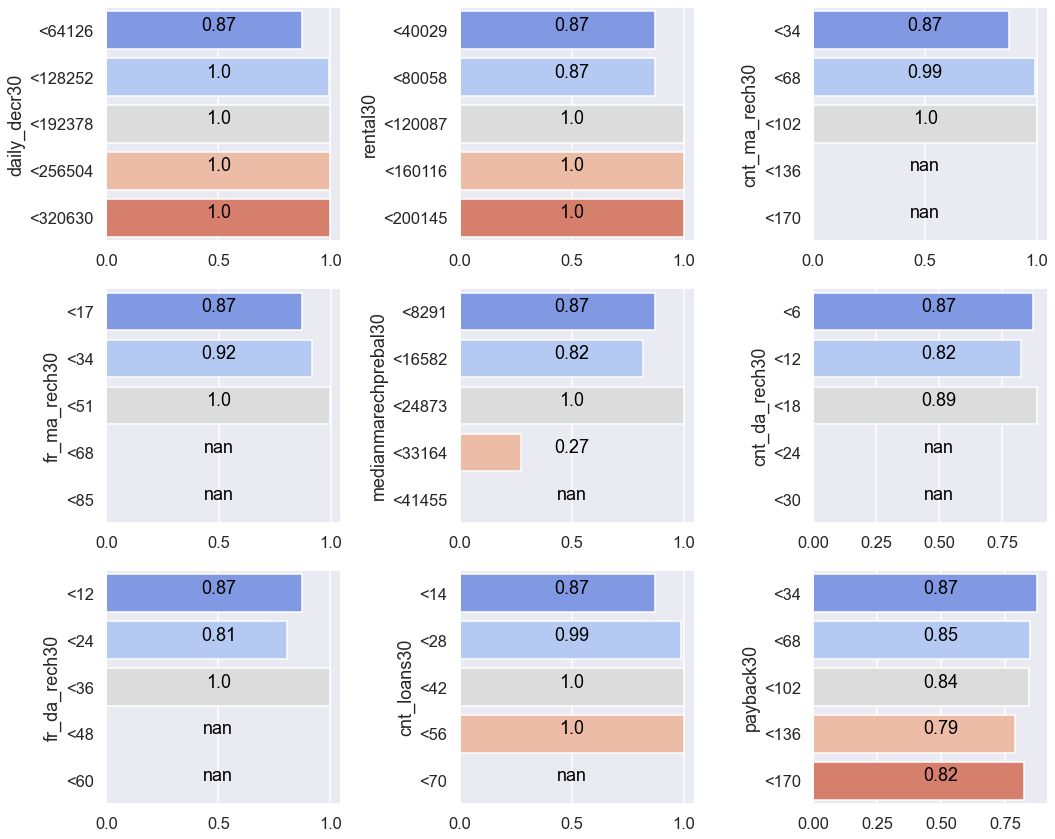

In [277]:
### Plotting payback rates
plt.figure(figsize=(15,12))

for i,j in enumerate(data_temp[cols].columns[:-1]):
    plt.subplot(3,3,i+1)
    
    mx = [i for i in np.arange(0,max(data_temp[cols90[i]])+1,int((max(data_temp[cols90[i]]))/5))]
    d = pd.cut(data_temp[j], mx,right=False).value_counts()
    df = pd.cut(data_temp[data_temp.label==1][j], mx,right=False ).value_counts().agg(lambda x: (x/d.loc[x.index]))
    df = df.sort_index()
    g = sns.barplot(y=df.index,x=df.values,palette='coolwarm')
    for index, row in enumerate(df.values):
        g.text(0.5,index, round(row,2), color='black', ha="center")
    plt.yticks([0,1,2,3,4],['<'+str(int(i)) for i in mx[1:]])
    plt.ylabel(j)
    plt.xlabel(None)
    
plt.tight_layout()
plt.show()

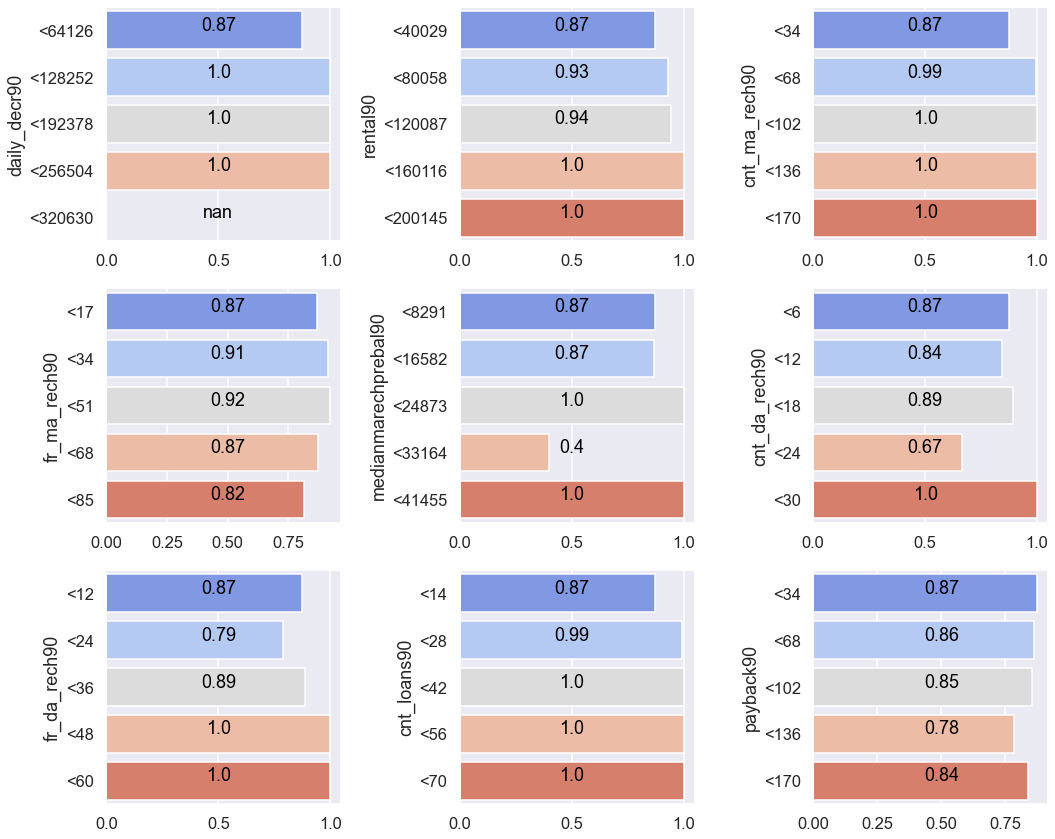

In [278]:
plt.figure(figsize=(15,12))

for i,j in enumerate(data_temp[cols90].columns[:-1]):
    plt.subplot(3,3,i+1)
    
    mx = [i for i in np.arange(0,max(data_temp[j])+1,int((max(data_temp[j]))/5))]
    d = pd.cut(data_temp[j], mx,right=False).value_counts()
    df = pd.cut(data_temp[data_temp.label==1][j], mx,right=False ).value_counts().agg(lambda x: (x/d.loc[x.index]))
    df = df.sort_index()
    g = sns.barplot(y=df.index,x=df.values,palette='coolwarm')
    for index, row in enumerate(df.values):
        g.text(0.5,index, round(row,2), color='black', ha="center")
    plt.yticks([0,1,2,3,4],['<'+str(int(i)) for i in mx[1:]])
    plt.ylabel(j)
    plt.xlabel(None)
    
plt.tight_layout()
plt.show()

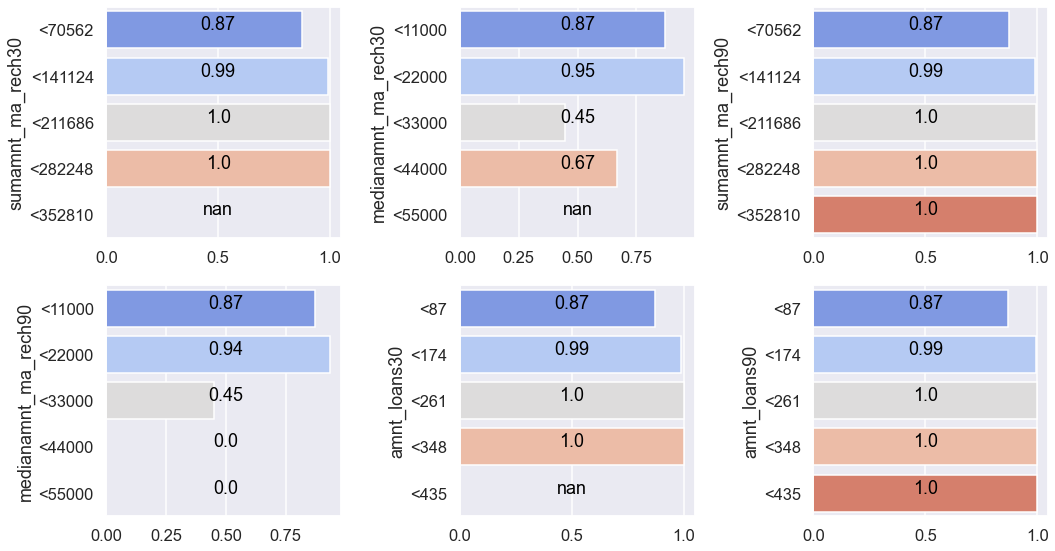

In [279]:
plt.figure(figsize=(15,8))

for i,j in enumerate(data_temp[colsamnt].columns[:-1]):
    plt.subplot(2,3,i+1)
    
    mx = [i for i in np.arange(0,max(data_temp[j[:-2]+'90'])+1,int((max(data_temp[j[:-2]+'90']))/5))]
    d = pd.cut(data_temp[j], mx,right=False).value_counts()
    df = pd.cut(data_temp[data_temp.label==1][j], mx,right=False ).value_counts().agg(lambda x: (x/d.loc[x.index]))
    df = df.sort_index()
    g = sns.barplot(y=df.index,x=df.values,palette='coolwarm')
    for index, row in enumerate(df.values):
        g.text(0.5,index, round(row,2), color='black', ha="center")
    plt.yticks([0,1,2,3,4],['<'+str(int(i)) for i in mx[1:]])
    plt.ylabel(j)
    plt.xlabel(None)
    
plt.tight_layout()
plt.show()

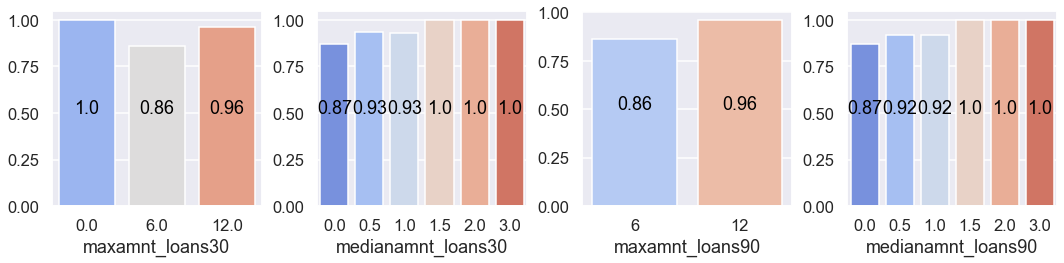

In [280]:
plt.figure(figsize=(15,4))

for i,j in enumerate(data_temp[rest].columns[:-1]):
    plt.subplot(1,4,i+1)
    
    d = data_temp[j].value_counts()
    df = data_temp[data_temp.label==1][j].value_counts().agg(lambda x: (x/d.loc[x.index]))
    df = df.sort_index()
    
    g = sns.barplot(x=df.index,y=df.values,palette='coolwarm')
    for index, row in enumerate(df.values):
        g.text(index,0.5, round(row,2), color='black', ha="center")
    plt.xticks([i for i in np.arange(len(df.index))],df.index)
    plt.xlabel(j)
    plt.ylabel(None)
    
plt.tight_layout()
plt.show()

In [281]:
data_temp.label.value_counts()/len(data_temp)

1    0.873984
0    0.126016
Name: label, dtype: float64

## Feature engineering

#### One hot Encoding

In [282]:
df_maxamnt_loans30 = data.maxamnt_loans30.agg(lambda x: pd.Series(1,[x])).fillna(0)

In [283]:
df_maxamnt_loans30.columns = ['maxamnt_loans30_'+str(i) for i in [0,6,12]]

In [284]:
df_maxamnt_loans90 = data.maxamnt_loans90.agg(lambda x: pd.Series(1,[x])).fillna(0)

In [286]:
df_maxamnt_loans90.columns = ['maxamnt_loans90_'+str(i) for i in [6,12]]

In [287]:
df_medianamnt_loans30 = data.medianamnt_loans30.agg(lambda x: pd.Series(1,[x])).fillna(0)

In [288]:
df_medianamnt_loans30.columns = ['medianamnt_loans30_'+str(i) for i in [0,0.5,1.0,1.5,2.0,3.0]]

In [289]:
df_medianamnt_loans90 = data.medianamnt_loans90.agg(lambda x: pd.Series(1,[x])).fillna(0)

In [290]:
df_medianamnt_loans90.columns = ['medianamnt_loans90_'+str(i) for i in [0,0.5,1.0,1.5,2.0,3.0]]

In [291]:
data.drop(columns=['maxamnt_loans30','maxamnt_loans90','medianamnt_loans30','medianamnt_loans90'],inplace=True)

In [292]:
df = pd.concat([df_maxamnt_loans30,df_maxamnt_loans90,df_medianamnt_loans30,df_medianamnt_loans90],axis=1)

In [293]:
data = pd.concat([data,df],axis=1)

In [294]:
data.shape

(197411, 45)

#### Apply box cox to remove skewness

In [295]:
from skew_autotransform import skew_autotransform

In [296]:
X = data.drop(columns=['label'])
y = data.label

In [297]:
skew_transformed = []
for i in X.columns:
    skew_transformed.append(skew_autotransform(X[[i]].copy(deep=True), plot = False, exp = False, threshold = 0.5))

In [298]:
X = pd.concat(skew_transformed,axis=1)

#### Feature transformation

In [299]:
from sklearn.preprocessing import QuantileTransformer

In [300]:
scaler = QuantileTransformer(output_distribution='normal').fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [301]:
X_scaled.shape

(197411, 44)

#### Dimension reduction

In [302]:
from sklearn.decomposition import PCA

In [303]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [304]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
sum(cumsum <= 0.999)

30

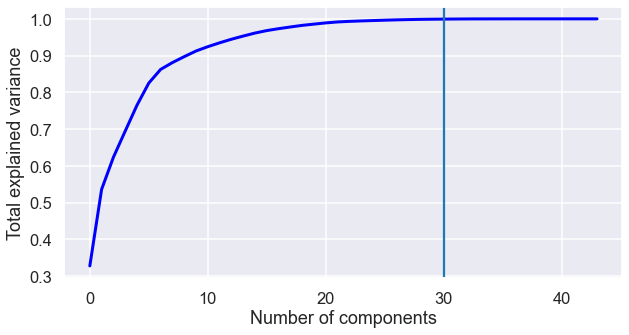

In [306]:
plt.figure(figsize=(10,5))
plt.plot(np.arange(0,44), cumsum, color='blue', lw=3)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.axvline(30)
plt.show()

In [307]:
pca = PCA(n_components=30)
pca.fit(X_scaled)
X_pca = pd.DataFrame(pca.transform(X_scaled))
X_pca.shape

(197411, 30)

#### Find out the best random state

In [308]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix,classification_report

In [309]:
# Find out best random_state
random_state = []
for i in range(1,101):
    if i%10 == 0:
      print('-->',i,end=' ')
    x_train, x_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.3,random_state=i)
    model = LogisticRegression().fit(x_train,y_train)
    pred = model.predict_proba(x_test)[:,1]
    random_state.append(roc_auc_score(y_test,pred))
print('Best random state : ',random_state.index(max(random_state))+1,max(random_state))

--> 10 --> 20 --> 30 --> 40 --> 50 --> 60 --> 70 --> 80 --> 90 --> 100 Best random state :  21 0.8472404158735221


#### Split data into train and test, where test is 30% of the entire data

In [310]:
x_train, x_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.3,random_state=21)

#### Feature selection based on importances

In [312]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

In [313]:
model = XGBClassifier()
model.fit(x_train,y_train)

[02:06:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

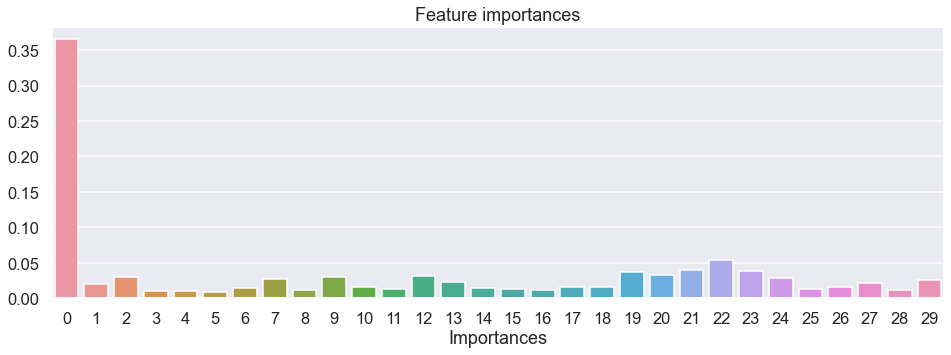

In [314]:
### PLotting feature importances
importance = dict(enumerate(model.feature_importances_))
plt.figure(figsize=(16,5))
sns.barplot(x=np.arange(len(importance)),y=list(importance.values()))
plt.xlabel('Features')
plt.xlabel('Importances')
plt.title('Feature importances')
plt.show()

In [315]:
scores = []
thresholds = sorted(model.feature_importances_)
for thresh in thresholds:
    fs = SelectFromModel(model,threshold=thresh,prefit=True)
    x_train_fs = fs.transform(x_train)
    x_test_fs = fs.transform(x_test)
    selection_model = XGBClassifier(objective='reg:logistic')
    selection_model.fit(x_train_fs, y_train)
    pred = selection_model.predict(x_test_fs)
    predictions = [round(value) for value in pred]
    score = f1_score(y_test,predictions,average='macro')
    scores.append(score)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, x_train_fs.shape[1], score*100.0))

Thresh=0.009, n=30, Accuracy: 76.85%
Thresh=0.010, n=29, Accuracy: 76.75%
Thresh=0.010, n=28, Accuracy: 76.74%
Thresh=0.012, n=27, Accuracy: 76.92%
Thresh=0.012, n=26, Accuracy: 76.86%
Thresh=0.012, n=25, Accuracy: 76.77%
Thresh=0.012, n=24, Accuracy: 77.05%
Thresh=0.013, n=23, Accuracy: 77.00%
Thresh=0.013, n=22, Accuracy: 76.88%
Thresh=0.014, n=21, Accuracy: 76.85%
Thresh=0.015, n=20, Accuracy: 76.74%
Thresh=0.016, n=19, Accuracy: 76.95%
Thresh=0.016, n=18, Accuracy: 76.98%
Thresh=0.016, n=17, Accuracy: 76.87%
Thresh=0.016, n=16, Accuracy: 76.63%
Thresh=0.020, n=15, Accuracy: 77.01%
Thresh=0.021, n=14, Accuracy: 76.66%
Thresh=0.023, n=13, Accuracy: 76.72%
Thresh=0.026, n=12, Accuracy: 76.57%
Thresh=0.027, n=11, Accuracy: 76.47%
Thresh=0.028, n=10, Accuracy: 76.46%
Thresh=0.030, n=9, Accuracy: 76.66%
Thresh=0.030, n=8, Accuracy: 76.54%
Thresh=0.031, n=7, Accuracy: 75.07%
Thresh=0.033, n=6, Accuracy: 75.34%
Thresh=0.038, n=5, Accuracy: 75.30%
Thresh=0.038, n=4, Accuracy: 74.24%
Thresh=

In [316]:
### Use only the selected features
fs = SelectFromModel(model,threshold=thresholds[15],prefit=True)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [317]:
print(x_train_fs.shape)
print(x_test_fs.shape)

(138187, 15)
(59224, 15)


## MODEL BUILDING

In [318]:
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold, cross_validate, StratifiedKFold, GridSearchCV,cross_val_score

In [350]:
### Create dictionary of models to be trained
model_dict = {
    'LogisticReg':LogisticRegression(),
    'lightgbm':LGBMClassifier(),
    'StochasticGD':SGDClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'Bagging':BaggingClassifier(),
    'RandomForest':RandomForestClassifier(),
    'GradientBoost':GradientBoostingClassifier(),
    'KNN':KNeighborsClassifier()
}

### Apply crossvalidation on each model
cv_score_f1 = {}
cv_score_f1_train = {}
for i in model_dict:
    kfold = KFold(n_splits=10,random_state=61,shuffle=False)
    cv_results = cross_validate(model_dict[i], x_train_fs, y_train, scoring='f1_macro', cv=kfold,return_train_score=True,return_estimator=True)
    cv_score_f1[i] = round(np.mean(cv_results['test_score']),3)
    cv_score_f1_train[i] = round(np.mean(cv_results['train_score']),3)
    
from tabulate import tabulate
df = pd.DataFrame([cv_score_f1,cv_score_f1_train],
                  index=['test_F1','train_F1']).T
df.index.names = ['Algorithm']
print(tabulate(df, headers='keys', tablefmt='pretty',stralign='center'))

In [351]:
cv_score_f1 = {}
cv_score_f1_train = {}
for i in model_dict:
    print(i)
    kfold = KFold(n_splits=10,random_state=61,shuffle=False)
    cv_results = cross_validate(model_dict[i], x_train_fs, y_train, scoring='f1_macro', cv=kfold,return_train_score=True,return_estimator=True)
    cv_score_f1[i] = round(np.mean(cv_results['test_score']),3)
    cv_score_f1_train[i] = round(np.mean(cv_results['train_score']),3)

LogisticReg
lightgbm
StochasticGD
AdaBoost
Bagging
RandomForest
GradientBoost
KNN


In [94]:
from tabulate import tabulate

In [352]:
df = pd.DataFrame([cv_score_f1,cv_score_f1_train],
                  index=['test_F1','train_F1']).T
df.index.names = ['Algorithm']
print(tabulate(df, headers='keys', tablefmt='pretty',stralign='center'))

+---------------+---------+----------+
|   Algorithm   | test_F1 | train_F1 |
+---------------+---------+----------+
|  LogisticReg  |  0.633  |  0.633   |
|   lightgbm    |  0.759  |  0.772   |
| StochasticGD  |  0.614  |  0.614   |
|   AdaBoost    |  0.708  |   0.71   |
|    Bagging    |  0.765  |  0.988   |
| RandomForest  |  0.765  |   1.0    |
| GradientBoost |  0.731  |  0.735   |
|      KNN      |  0.757  |  0.814   |
+---------------+---------+----------+


### Apply SMOTE technique to upsample the minority class

In [320]:
from imblearn.over_sampling import SMOTE

In [327]:
sm = SMOTE(random_state=21)

In [328]:
x_res, y_res = sm.fit_resample(x_train_fs, y_train)

In [329]:
y_res.value_counts()

1    120777
0    120777
Name: label, dtype: int64

In [331]:
### To find out the rate of missclassified defaulters
def calculate_defaulter_rate(pred,y_test):
    df = pd.DataFrame(pred)
    return round((y_test.iloc[df[df[0]==1].index].value_counts()/len(y_test.iloc[df[df[0]==1].index]))[0]*100,2)

### Light Gradient Boosting Machine 

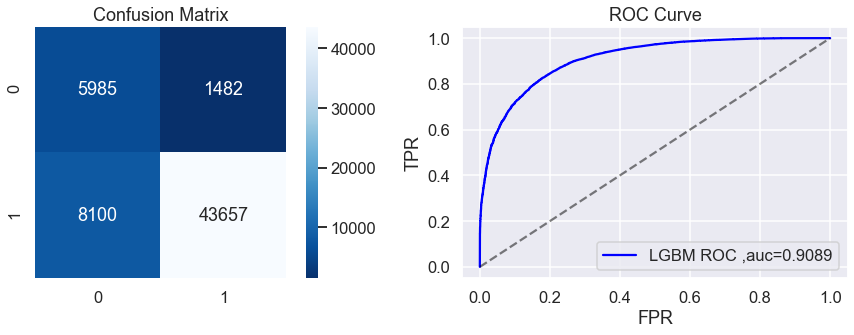

              precision    recall  f1-score   support

           0       0.42      0.80      0.56      7467
           1       0.97      0.84      0.90     51757

    accuracy                           0.84     59224
   macro avg       0.70      0.82      0.73     59224
weighted avg       0.90      0.84      0.86     59224

Train F1 Score :  0.85


In [332]:
lgbm_model = LGBMClassifier().fit(x_res,y_res)
pred = lgbm_model.predict(x_test_fs)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,pred),square=True,fmt='d',annot=True,cmap='Blues_r')
plt.title('Confusion Matrix')
plt.subplot(1,2,2)
pred1 = lgbm_model.predict_proba(x_test_fs)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred1)
plt.plot(fpr1, tpr1, label='LGBM ROC ,auc='+str(round(roc_auc_score(y_test,pred1),4)),color='blue')
plt.plot(np.array([0,1]),np.array([0,1]),linestyle='--',color='k',alpha=0.5)
plt.title('ROC Curve') 
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.tight_layout()
plt.show()
print(classification_report(y_test,pred))
pred_train = lgbm_model.predict(x_res)
print('Train F1 Score : ',round(f1_score(y_res,pred_train,average='macro'),2))

In [333]:
print('Defaulter rate : ',calculate_defaulter_rate(pred,y_test),'%')

Defaulter rate :  3.28 %


### Bagging

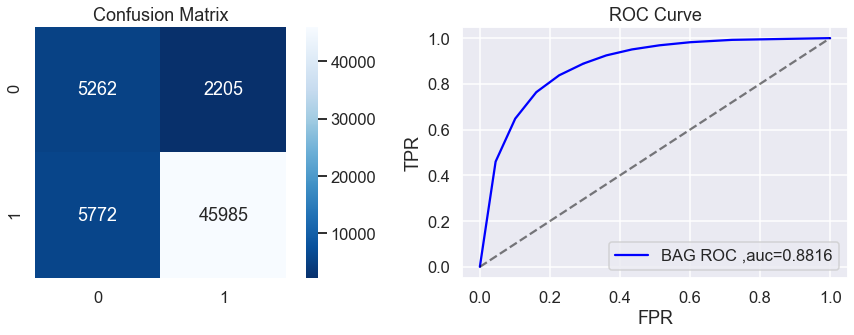

              precision    recall  f1-score   support

           0       0.48      0.70      0.57      7467
           1       0.95      0.89      0.92     51757

    accuracy                           0.87     59224
   macro avg       0.72      0.80      0.74     59224
weighted avg       0.89      0.87      0.88     59224

Train F1 Score :  1.0


In [334]:
bag_model = BaggingClassifier().fit(x_res,y_res)
pred = bag_model.predict(x_test_fs)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,pred),square=True,fmt='d',annot=True,cmap='Blues_r')
plt.title('Confusion Matrix')
plt.subplot(1,2,2)
pred1 = bag_model.predict_proba(x_test_fs)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred1)
plt.plot(fpr1, tpr1, label='BAG ROC ,auc='+str(round(roc_auc_score(y_test,pred1),4)),color='blue')
plt.plot(np.array([0,1]),np.array([0,1]),linestyle='--',color='k',alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.tight_layout()
plt.show()
print(classification_report(y_test,pred))
pred_train = bag_model.predict(x_res)
print('Train F1 Score : ',round(f1_score(y_res,pred_train,average='macro'),2))

In [335]:
print('Defaulter rate : ',calculate_defaulter_rate(pred,y_test),'%')

Defaulter rate :  4.58 %


### Random Forest

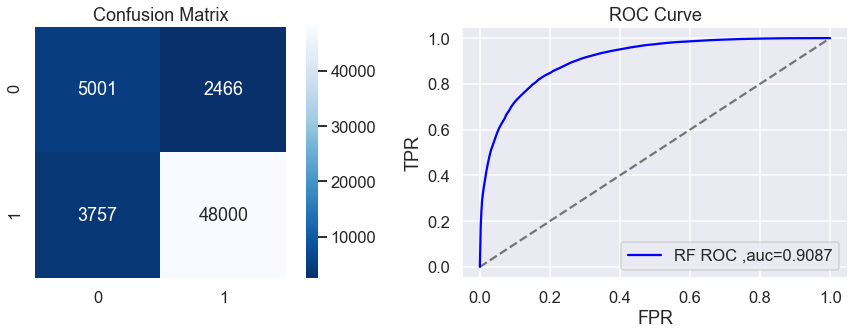

              precision    recall  f1-score   support

           0       0.57      0.67      0.62      7467
           1       0.95      0.93      0.94     51757

    accuracy                           0.89     59224
   macro avg       0.76      0.80      0.78     59224
weighted avg       0.90      0.89      0.90     59224

Train F1 Score :  1.0


In [336]:
rfc_model = RandomForestClassifier().fit(x_res,y_res)
pred = rfc_model.predict(x_test_fs)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,pred),square=True,fmt='d',annot=True,cmap='Blues_r')
plt.title('Confusion Matrix')
plt.subplot(1,2,2)
pred1 = rfc_model.predict_proba(x_test_fs)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred1)
plt.plot(fpr1, tpr1, label='RF ROC ,auc='+str(round(roc_auc_score(y_test,pred1),4)),color='blue')
plt.plot(np.array([0,1]),np.array([0,1]),linestyle='--',color='k',alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.tight_layout()
plt.show()
print(classification_report(y_test,pred))
pred_train = rfc_model.predict(x_res)
print('Train F1 Score : ',round(f1_score(y_res,pred_train,average='macro'),2))

In [337]:
print('Defaulter rate : ',calculate_defaulter_rate(pred,y_test),'%')

Defaulter rate :  4.89 %


### Gradient Boosting

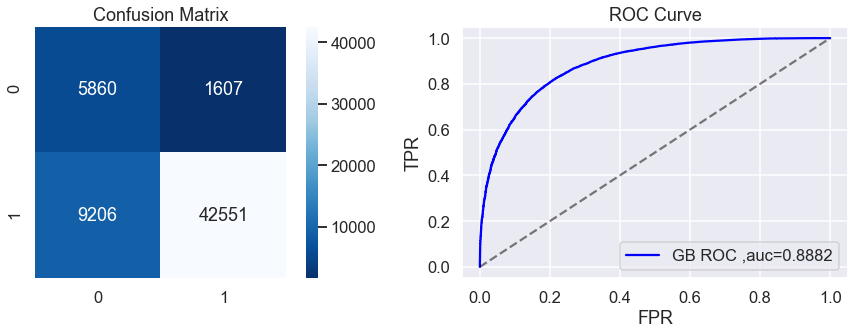

              precision    recall  f1-score   support

           0       0.39      0.78      0.52      7467
           1       0.96      0.82      0.89     51757

    accuracy                           0.82     59224
   macro avg       0.68      0.80      0.70     59224
weighted avg       0.89      0.82      0.84     59224

Train F1 Score :  0.81


In [338]:
gbc_model = GradientBoostingClassifier().fit(x_res,y_res)
pred = gbc_model.predict(x_test_fs)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,pred),square=True,fmt='d',annot=True,cmap='Blues_r')
plt.title('Confusion Matrix')
plt.subplot(1,2,2)
pred1 = gbc_model.predict_proba(x_test_fs)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred1)
plt.plot(fpr1, tpr1, label='GB ROC ,auc='+str(round(roc_auc_score(y_test,pred1),4)),color='blue')
plt.plot(np.array([0,1]),np.array([0,1]),linestyle='--',color='k',alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.tight_layout()
plt.show()
print(classification_report(y_test,pred))
pred_train = gbc_model.predict(x_res)
print('Train F1 Score : ',round(f1_score(y_res,pred_train,average='macro'),2))

In [339]:
print('Defaulter rate : ',calculate_defaulter_rate(pred,y_test),'%')

Defaulter rate :  3.64 %


### K Nearest Neighbor

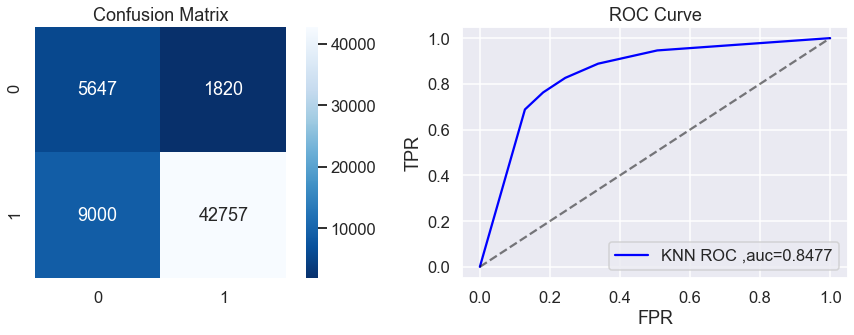

              precision    recall  f1-score   support

           0       0.39      0.76      0.51      7467
           1       0.96      0.83      0.89     51757

    accuracy                           0.82     59224
   macro avg       0.67      0.79      0.70     59224
weighted avg       0.89      0.82      0.84     59224

Train F1 Score :  0.93


In [340]:
knn_model = KNeighborsClassifier().fit(x_res,y_res)
pred = knn_model.predict(x_test_fs)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,pred),square=True,fmt='d',annot=True,cmap='Blues_r')
plt.title('Confusion Matrix')
plt.subplot(1,2,2)
pred1 = knn_model.predict_proba(x_test_fs)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred1)
plt.plot(fpr1, tpr1, label='KNN ROC ,auc='+str(round(roc_auc_score(y_test,pred1),4)),color='blue')
plt.plot(np.array([0,1]),np.array([0,1]),linestyle='--',color='k',alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.tight_layout()
plt.show()
print(classification_report(y_test,pred))
pred_train = knn_model.predict(x_res)
print('Train F1 Score : ',round(f1_score(y_res,pred_train,average='macro'),2))

In [341]:
print('Defaulter rate : ',calculate_defaulter_rate(pred,y_test),'%')

Defaulter rate :  4.08 %


## Hyper-Parameter Tuning

### Lets take random sub-sample from the training data for hyper parameter tuning

In [342]:
x_res_df = pd.concat([pd.DataFrame(x_res),y_res],axis=1)

In [343]:
from sklearn.model_selection import StratifiedShuffleSplit

In [344]:
sss = StratifiedShuffleSplit(n_splits=10,train_size=0.1)

In [345]:
for train_index, test_index in sss.split(x_res, y_res):
    xtr, _ = x_res[train_index], x_res[test_index]
    ytr, _ = y_res[train_index], y_res[test_index]
print(ytr.value_counts())

0    12078
1    12077
Name: label, dtype: int64


### Light gradient boosting machine

In [411]:
# Tune parameter of LGBM Classifier
params = {
    'n_estimators':[100,500],
    'class_weight':[{1:1,0:1},{1:1,0:1.5},{1:1,0:2}]
    }

kfold = KFold(n_splits=10)
lgbc_grid = GridSearchCV(LGBMClassifier(), param_grid=params, scoring='roc_auc', cv=kfold,verbose=1)
lgbc_grid.fit(xtr,ytr)
print('Best: %f using %s' % (lgbc_grid.best_score_, lgbc_grid.best_params_))

Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.5min finished


Best: 0.930152 using {'class_weight': {1: 1, 0: 2}, 'n_estimators': 500}


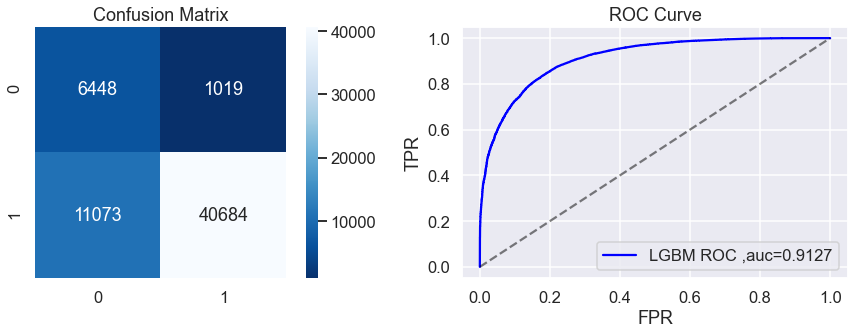

              precision    recall  f1-score   support

           0       0.37      0.86      0.52      7467
           1       0.98      0.79      0.87     51757

    accuracy                           0.80     59224
   macro avg       0.67      0.82      0.69     59224
weighted avg       0.90      0.80      0.83     59224



In [412]:
lgbm_model = LGBMClassifier(class_weight={1: 1, 0: 2}, n_estimators=500).fit(x_res,y_res)
pred = lgbm_model.predict(x_test_fs)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test,pred),square=True,fmt='d',annot=True,cmap='Blues_r')
plt.title('Confusion Matrix')
plt.subplot(1,2,2)
pred1 = lgbm_model.predict_proba(x_test_fs)[:,1]
fpr1, tpr1, thresholds1 = roc_curve(y_test, pred1)
plt.plot(fpr1, tpr1, label='LGBM ROC ,auc='+str(round(roc_auc_score(y_test,pred1),4)),color='blue')
plt.plot(np.array([0,1]),np.array([0,1]),linestyle='--',color='k',alpha=0.5)
plt.title('ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.tight_layout()
plt.show()
print(classification_report(y_test,pred))

In [349]:
print('Defaulter rate : ', calculate_defaulter_rate(pred,y_test),'%')

Defaulter rate :  2.44 %


In [418]:
### Saving the final model
import joblib
joblib.dump(lgbm_model,'best_lgbm_micro_credit.pkl')

['best_lgbm_micro_credit.pkl']